In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
missing_values=['NaN','na','nan','--']
data=pd.read_csv("C:/Users/Akash Mishra/Documents/Capstones_deploy/Life_expectancy/data.csv",na_values=missing_values)
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.Country.nunique()

193

In [4]:
data.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' thinness  1-19 years':'thinness 10-19',' HIV/AIDS':'HIV/AIDS',' thinness 5-9 years':'thinness 5-9 years'},inplace=True)

Renaming the columns as many of the columns are named as such that it contained unnecessary spaces.

In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
data.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness 10-19                      34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

As we can see that most of our columns contains null values.Population,Hepatitis B, GDP and Total expenditure have more numbers of NULL values.

In [7]:
data.shape

(2938, 22)

In [8]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


    As we can see there are many unusual data are there 
    1. Adult Mortality contains the minimum as 0 and max as 723 which may be an outlier
    2. Infant deaths of 1800 which is also an outlier
    3. Max of Percentage expenditure which is 19479 and that of Measles which is 212183
    4. BMI of 1 and 87 .
    5. Under Five Deaths(perhaps even impossible) to have values at zero.
    6. GDP per capita as low as 1.68 (USD).
    7. Population of 34 for an entire country

In [9]:
data=data[data['Life expectancy'].notnull()]
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


    eliminating the nulls in the Life expectancy column

In [10]:
for label,content in data.items():
    if pd.isnull(content).sum():
        data[label] = content.fillna(content.median())

    Filling all the Null values with the their Median

In [11]:
data['status_num']=np.where(data['Status']=="Developing",0,1)
data['status_num'].value_counts()

0    2416
1     512
Name: status_num, dtype: int64

In [12]:
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19                     0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
status_num                         0
dtype: int64

In [13]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness 10-19                     float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
status_num                           int32
dtype: obje

checking if all the null values are covered 

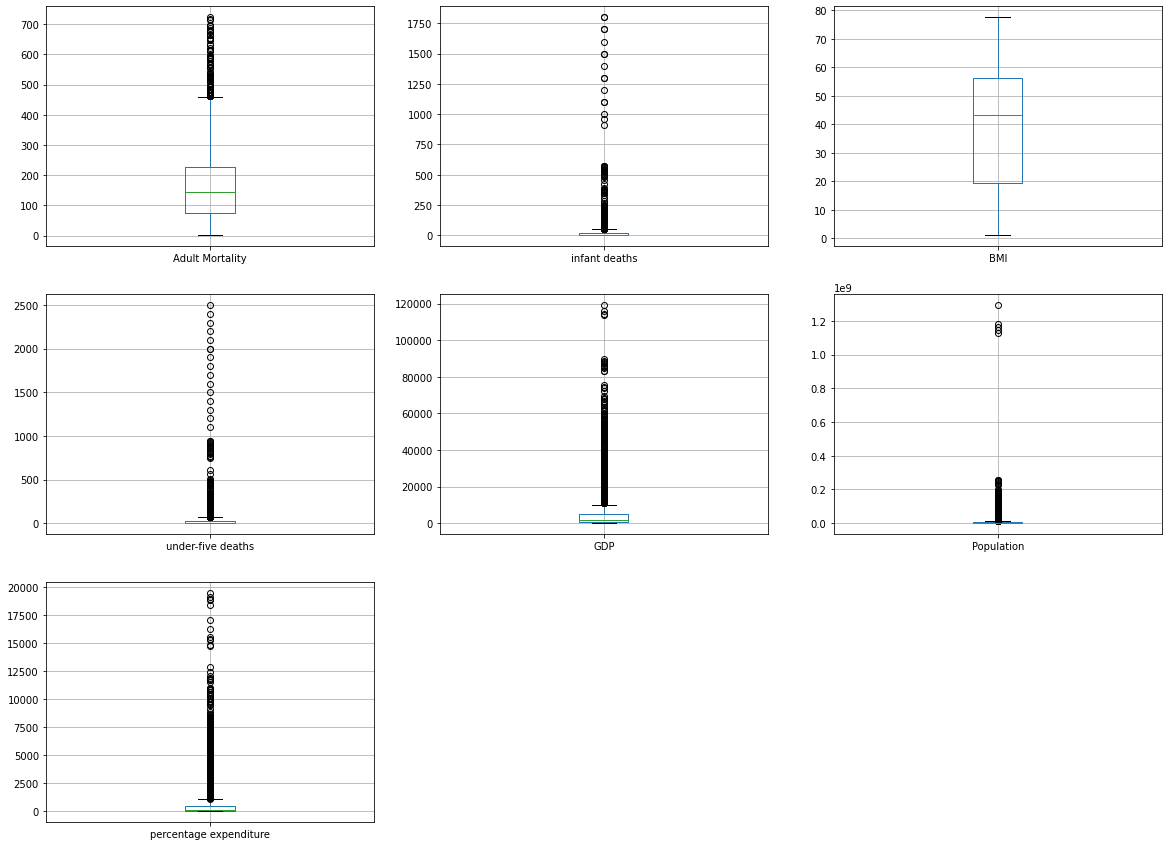

In [14]:
plt.figure(figsize=(20,15))
for i, col in enumerate(['Adult Mortality', 'infant deaths', 'BMI', 'under-five deaths', 'GDP', 'Population','percentage expenditure'], start=1):
    plt.subplot(3, 3, i)
    data.boxplot(col)

<Figure size 720x504 with 0 Axes>

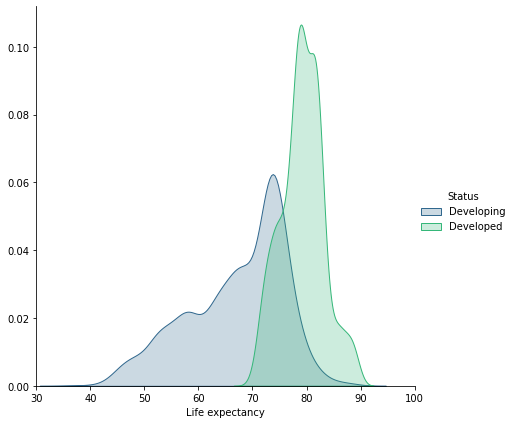

In [15]:
plt.figure(figsize=(10,7))
(sns.FacetGrid(data,hue='Status',height=6,xlim=(30,100),palette='viridis')
.map(sns.kdeplot,'Life expectancy',shade=True)
.add_legend())
plt.show()

The life expectancy column is negatively skewed. A negatively skewed distribution is a type of distribution in which more values are concentrated on the right side

In [16]:
LifeE_less=data[data['Life expectancy']<=50]
LifeE_less

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19,thinness 5-9 years,Income composition of resources,Schooling,status_num
53,Angola,2010,Developing,49.6,365.0,78,7.80,191.653741,77.0,1190,...,3.39,77.0,2.5,3529.534820,23369131.0,9.1,9.0,0.488,9.0,0
54,Angola,2009,Developing,49.1,369.0,81,7.01,212.922933,61.0,2807,...,4.37,6.0,2.5,3347.844850,22549547.0,9.3,9.2,0.480,8.5,0
55,Angola,2008,Developing,48.7,371.0,84,7.07,249.910196,69.0,265,...,3.84,69.0,2.6,3868.578883,2175942.0,9.5,9.4,0.468,8.1,0
56,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7,0
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,92.0,765,...,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


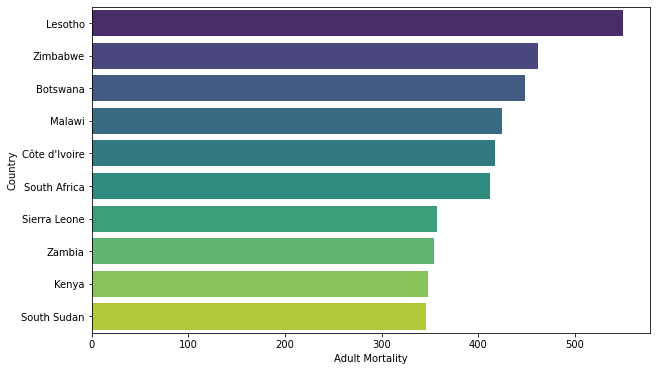

In [17]:
plt.figure(figsize=(10,6))
group_1=data.groupby('Country').mean()
group_1['Country']=group_1.index
sort=group_1.sort_values(by='Adult Mortality',ascending=False).head(10)
sns.barplot(x='Adult Mortality',y='Country',data=sort,palette='viridis')
plt.show()

This chart shows the countries with the most number of cases of Adult Mortality. Lesotho tops the list with the most number of Adult Mortality followed by Zimbabwe,Botswana and Malawi.

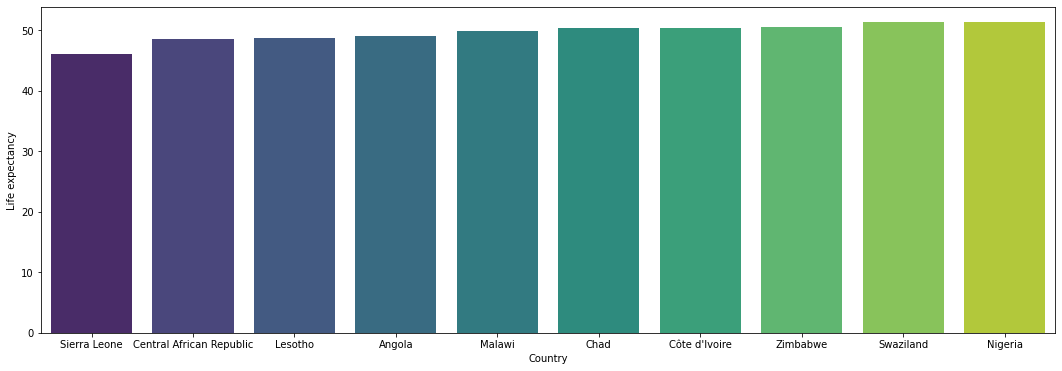

In [18]:
plt.figure(figsize=(40,6))
plt.subplot(1,2,1)
Less_life_expect=group_1.sort_values(by='Life expectancy',ascending=True).head(10)
sns.barplot(x='Country',y='Life expectancy',data=Less_life_expect,palette='viridis')
plt.show()

This chart is about how countries are faring in terms of the life expectancy. Sierra Leone,Central African Republic,Lesotho,Angola and Malawi are some of the countries with the very less Life expectancy
By looking at the group of countries in the both charts we can see that the countries having less life expectancy are the under developed African countries.

In [19]:
group_1.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19,thinness 5-9 years,Income composition of resources,Schooling,status_num,Country
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,Afghanistan
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,Albania
Algeria,2007.5,73.61875,108.1875,20.3125,0.616875,236.185241,81.5000,1943.8750,48.74375,23.5000,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,Algeria
Angola,2007.5,49.01875,328.5625,83.7500,5.617500,102.100268,79.7500,3561.3125,18.01875,132.6250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,Angola
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.688125,1001.585226,97.8750,0.0000,38.42500,0.0000,...,98.3125,0.12500,9759.305728,1.391756e+06,3.42500,3.37500,0.488625,8.84375,0,Antigua and Barbuda


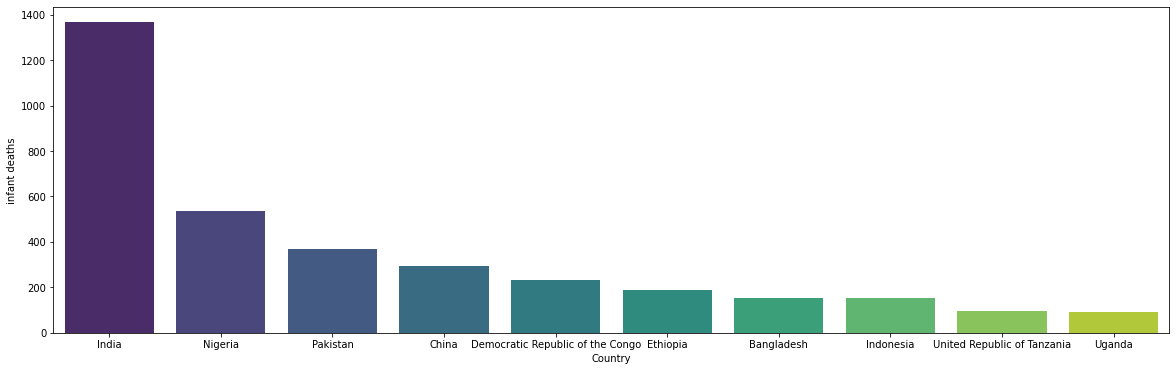

In [20]:
plt.figure(figsize=(20,6))
infant_sort=group_1.sort_values(by='infant deaths',ascending=False).head(10)
sns.barplot(x='Country',y='infant deaths',data=infant_sort,palette='viridis')
plt.show()

India records the most number of infants deaths followed by Nigeria and pakistan.

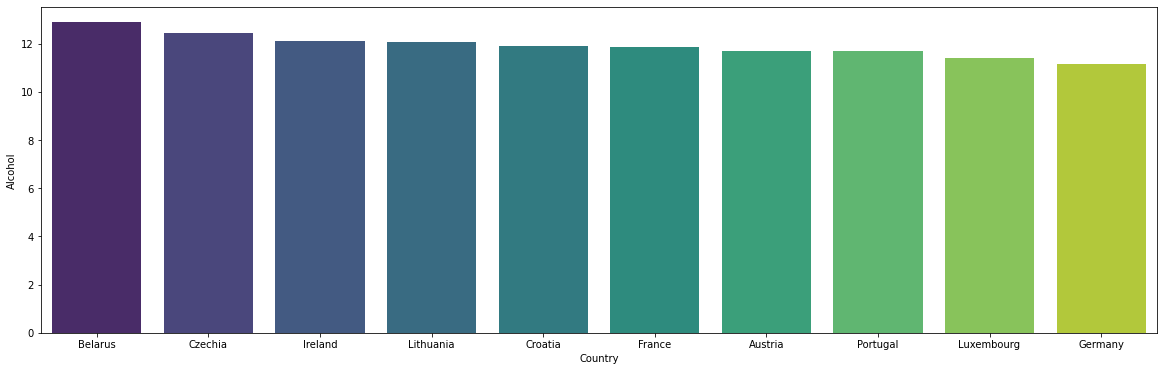

In [21]:
plt.figure(figsize=(20,6))
Alcohol_sort=group_1.sort_values(by='Alcohol',ascending=False).head(10)
sns.barplot(x='Country',y='Alcohol',data=Alcohol_sort,palette='viridis')
plt.show()

Belarus,Czechia,Ireland and Lithuania are the countries where the consumption of Alcohol are the most.

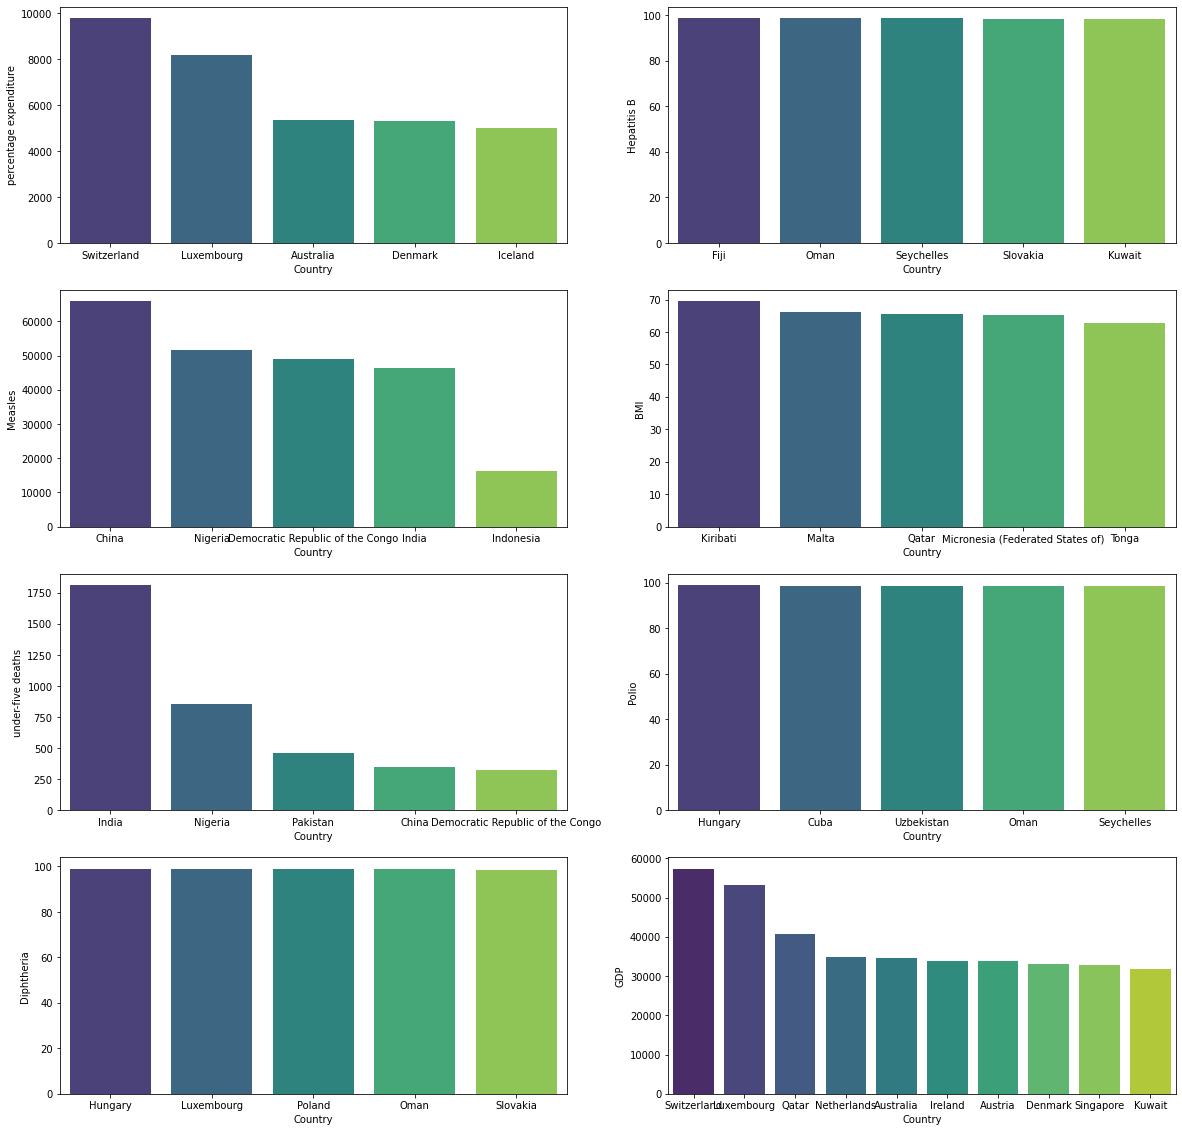

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
person_expen_sort=group_1.sort_values(by='percentage expenditure',ascending=False).head(5)
sns.barplot(x='Country',y='percentage expenditure',data=person_expen_sort,palette='viridis')

plt.subplot(4,2,2)
Hepatitis_sort=group_1.sort_values(by='Hepatitis B',ascending=False).head(5)
sns.barplot(x='Country',y='Hepatitis B',data=Hepatitis_sort,palette='viridis')

plt.subplot(4,2,3)
Measles_sort=group_1.sort_values(by='Measles',ascending=False).head(5)
sns.barplot(x='Country',y='Measles',data=Measles_sort,palette='viridis')

plt.subplot(4,2,4)
BMI_sort=group_1.sort_values(by='BMI',ascending=False).head(5)
sns.barplot(x='Country',y='BMI',data=BMI_sort,palette='viridis')

plt.subplot(4,2,5)
under_five_sort=group_1.sort_values(by='under-five deaths',ascending=False).head(5)
sns.barplot(x='Country',y='under-five deaths',data=under_five_sort,palette='viridis')

plt.subplot(4,2,6)
polio_sort=group_1.sort_values(by='Polio',ascending=False).head(5)
sns.barplot(x='Country',y='Polio',data=polio_sort,palette='viridis')

plt.subplot(4,2,7)
diphtheria_sort=group_1.sort_values(by='Diphtheria',ascending=False).head(5)
sns.barplot(x='Country',y='Diphtheria',data=diphtheria_sort,palette='viridis')

plt.subplot(4,2,8)
GDP_sort=group_1.sort_values(by='GDP',ascending=False).head(10)
sns.barplot(x='Country',y='GDP',data=GDP_sort,palette='viridis')
plt.show()

Conclusions:
1.switzerland,Luxembourg and Australia are the countries with the highest percentage expenditure.
2.Monaco,Palau have highest cases of hepatitis B
3.China,Nigeria and Democratic Republic of Congo have high cases of Measles.
4.Nauru,Palau have good BMI in comparison to other countries.
5.India tops the list with the most under five deaths in the world.
6.Hungary a European country tops the list in highest cases of diphtheria.
7.Switzerland,Luxembourg and Qatar are some of the countries with the highest GDPs in the world. 

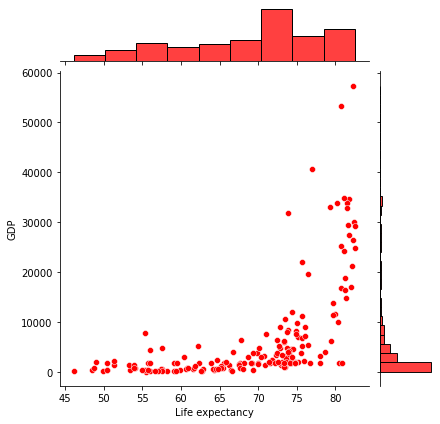

In [23]:
sns.jointplot('Life expectancy','GDP',data=group_1,color='red')
plt.show()

The life expectancy will be more in the country with the high GDPs.

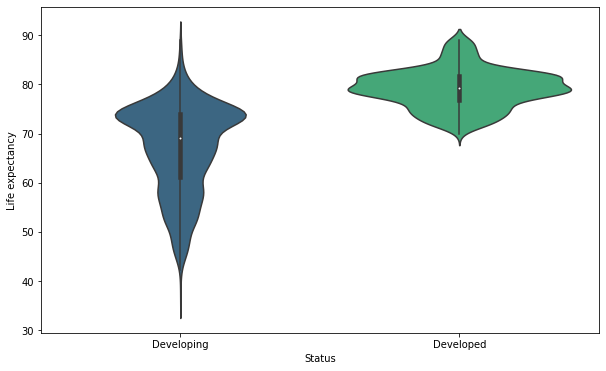

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Status',y='Life expectancy',data=data,palette='viridis')
plt.show()

Developing countries have low life expectancy as compared to the Developed countries.

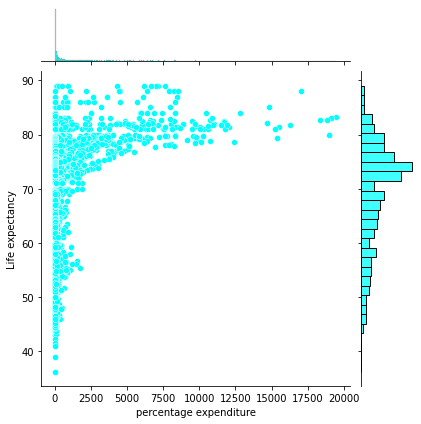

In [25]:
sns.jointplot(x='percentage expenditure',y='Life expectancy',data=data,color='cyan')
plt.show()

Life expectancy increases with the increase in the percentage expenditure by the country.

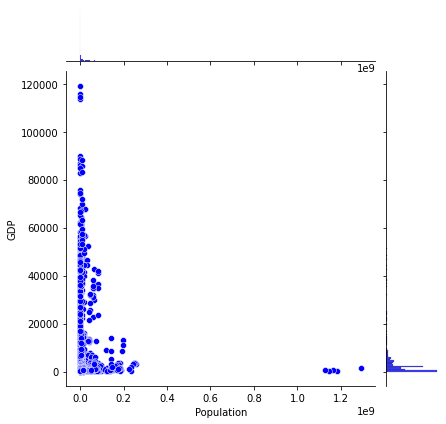

In [26]:
sns.jointplot(x='Population',y='GDP',data=data,color='blue')
plt.show()

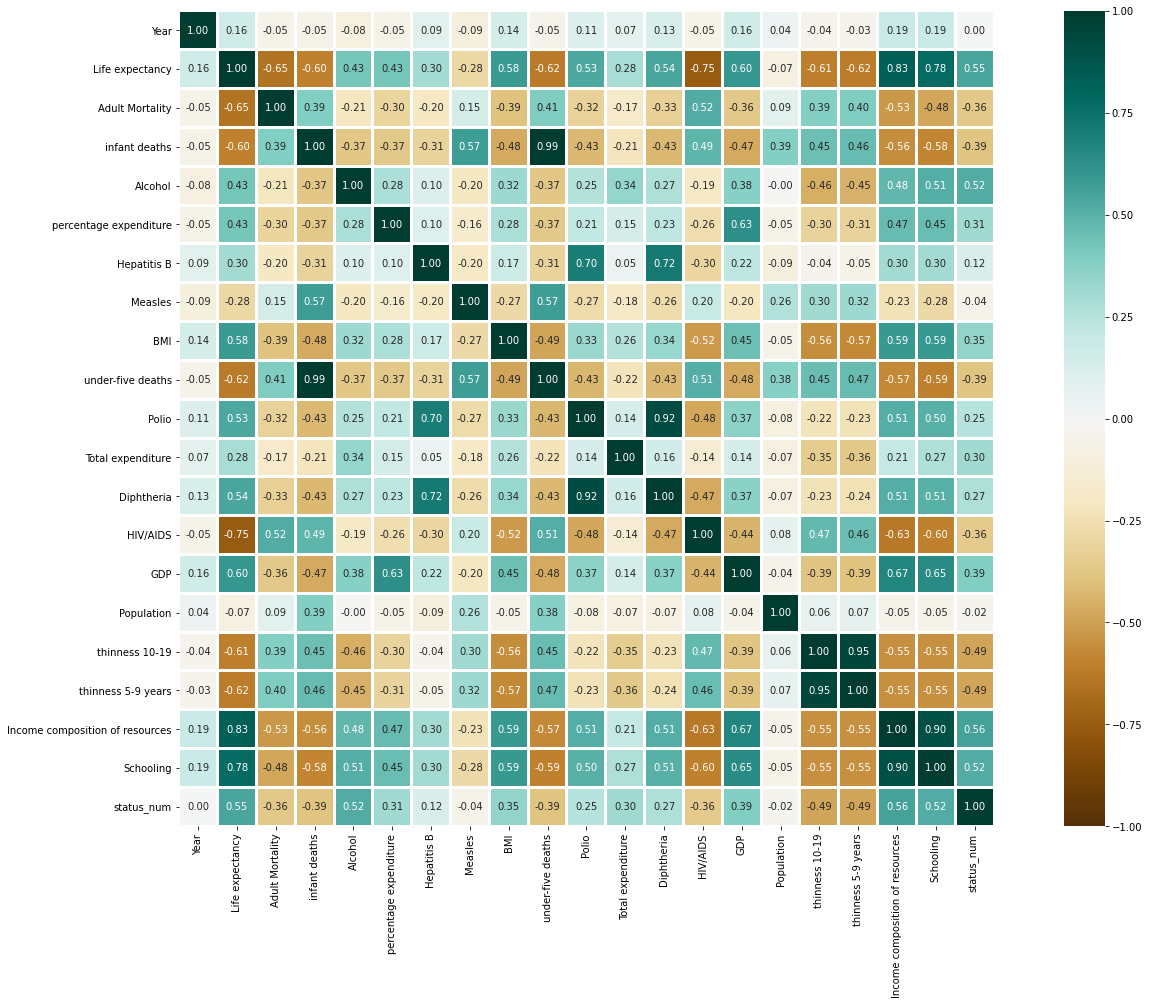

In [27]:
# Correlation Matrix with Spearman method
plt.figure(figsize=(25,15))
data_corr=data.corr(method='spearman')
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,square=True, linewidths=2)
plt.show()

    Life expectancy have more correlation with the following features: Alcohol consumption,percentage expenditure,BMI,Polio,Diphtheria,GDP,Income composition,Schooling.

In [28]:
#Dropping Certain columns whose correlation is low with the target variable 
#and those column where the correlation between the features is more than 0.90.
data.drop(['Country','Status','Year','Population','infant deaths','Diphtheria','thinness 5-9 years','Schooling'],axis=1,inplace=True)
data.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 10-19,Income composition of resources,status_num
0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,0.1,584.259210,17.2,0.479,0
1,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,0.1,612.696514,17.5,0.476,0
2,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,0.1,631.744976,17.7,0.470,0
3,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,0.1,669.959000,17.9,0.463,0
4,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,0.1,63.537231,18.2,0.454,0


In [29]:
data1=data.copy()

In [30]:
from scipy.stats.mstats import winsorize

In [31]:
features=['Adult Mortality','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','HIV/AIDS','GDP','thinness 10-19','Income composition of resources']
def percentile_capping(df,cols,from_lower,from_high):
    for col in cols:
        winsorize(a=df[col],limits=(from_lower,from_high),inplace=True)

In [32]:
percentile_capping(data1,features,0.05,0.05)

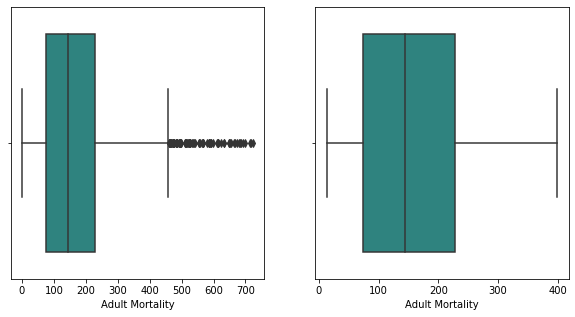

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Before winsorize')
sns.boxplot('Adult Mortality',data=data,palette='viridis')

plt.subplot(1,2,2)
plt.xlabel('After winsorize')
sns.boxplot("Adult Mortality",palette="viridis",data=data1)
plt.show()

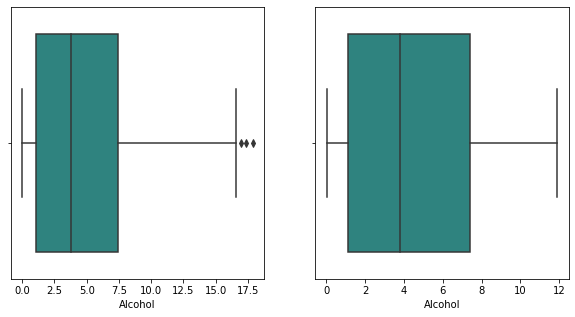

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot('Alcohol',data=data,palette='viridis')

plt.subplot(1,2,2)
sns.boxplot('Alcohol',data=data1,palette='viridis')
plt.show()

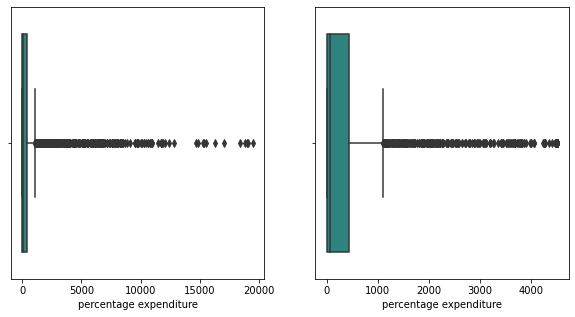

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot('percentage expenditure',data=data,palette='viridis')

plt.subplot(1,2,2)
sns.boxplot('percentage expenditure',data=data1,palette='viridis')
plt.show()

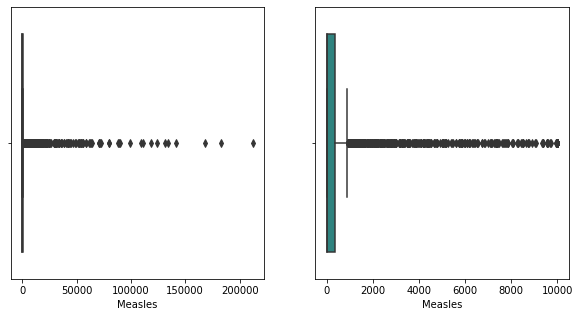

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot('Measles',data=data,palette='viridis')

plt.subplot(1,2,2)
sns.boxplot('Measles',data=data1,palette='viridis')
plt.show()

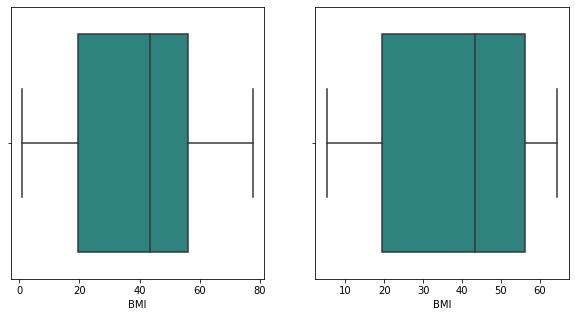

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot('BMI',data=data,palette='viridis')

plt.subplot(1,2,2)
sns.boxplot('BMI',data=data1,palette='viridis')
plt.show()

In [38]:
data1.describe()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 10-19,Income composition of resources,status_num
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,69.224932,159.948429,4.503733,555.831116,83.121243,1044.175205,38.213764,23.564891,82.701503,5.842999,1.172439,5788.808995,4.648770,0.642151,0.174863
std,9.523867,109.929743,3.798614,1140.118439,22.691089,2538.540844,19.424977,38.609048,23.078105,2.097351,2.259797,9833.938898,3.753896,0.170053,0.379915
min,36.300000,13.000000,0.010000,0.000000,9.000000,0.000000,5.200000,0.000000,9.000000,1.980000,0.100000,81.683884,0.600000,0.291000,0.000000
25%,63.100000,74.000000,1.107500,4.853964,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,0.100000,578.797095,1.600000,0.504000,0.000000
50%,72.100000,144.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,0.100000,1764.973870,3.300000,0.677000,0.000000
75%,75.700000,228.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,0.800000,4793.630903,7.100000,0.773000,0.000000
max,89.000000,399.000000,11.890000,4508.806185,99.000000,10000.000000,64.500000,138.000000,99.000000,9.690000,8.600000,37698.785730,13.800000,0.890000,1.000000


In [39]:
data1.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 10-19,Income composition of resources,status_num
0,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,9.0,8.16,0.1,584.259210,13.8,0.479,0
1,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,0.1,612.696514,13.8,0.476,0
2,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,0.1,631.744976,13.8,0.470,0
3,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,0.1,669.959000,13.8,0.463,0
4,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,0.1,81.683884,13.8,0.454,0


In [40]:
X=data1.drop(['Life expectancy'],axis=1)
y=data1['Life expectancy']

In [41]:
X.columns

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'HIV/AIDS', 'GDP', 'thinness 10-19', 'Income composition of resources',
       'status_num'],
      dtype='object')

In [42]:
dummy_col=['status_num']
X=pd.get_dummies(X,columns=dummy_col)

In [43]:
standard_col=['Adult Mortality','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','HIV/AIDS','GDP','thinness 10-19','Income composition of resources']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
for i in standard_col:
    X[i]=scale.fit_transform(X[[i]])
X.head()

,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 10-19,Income composition of resources,status_num_0,status_num_1
0,0.937591,-1.183195,-0.425074,-0.798743,0.043270,-0.984147,1.539672,-3.194114,1.104916,-0.474654,-0.529334,2.438211,-0.959576,1,0
1,1.010378,-1.183195,-0.423105,-0.930976,-0.217554,-1.009891,1.617387,-1.070526,1.114454,-0.474654,-0.526442,2.438211,-0.977220,1,0
2,0.983083,-1.183195,-0.423372,-0.842820,-0.241982,-1.035636,1.695102,-0.897172,1.090610,-0.474654,-0.524504,2.438211,-1.012509,1,0
3,1.019476,-1.183195,-0.419017,-0.710587,0.686663,-1.061380,1.798723,-0.680480,1.276591,-0.474654,-0.520618,2.438211,-1.053680,1,0
4,1.046771,-1.183195,-0.481378,-0.666509,0.775706,-1.081976,1.902343,-0.637141,0.966623,-0.474654,-0.580449,2.438211,-1.106613,1,0


In [44]:
X.columns

Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'HIV/AIDS', 'GDP', 'thinness 10-19', 'Income composition of resources',
       'status_num_0', 'status_num_1'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

    GRADIENT BOOSTING REGRESSOR

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=4,max_features = 'sqrt',random_state=33)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
y_train_pred = gbr.predict(X_train)

In [47]:
#Validation on training data
print('R2 score of the training data is : {:.2f}'.format(r2_score(y_train, y_train_pred)*100))
print('Mean absolute error of the training data is : {:.2f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('\n')
#validation on test data
print('R2 score of the testing data is : {:.2f}'.format(r2_score(y_test, gbr_pred)*100))
print('Mean absolute error of the testing data is : {:.2f}'.format(mean_absolute_error(y_test, gbr_pred)))


R2 score of the training data is : 97.06
Mean absolute error of the training data is : 1.17


R2 score of the testing data is : 94.44
Mean absolute error of the testing data is : 1.57


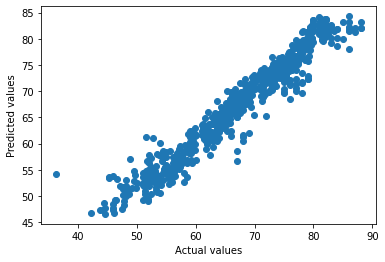

In [48]:
plt.scatter(y_test,gbr_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

    RANDOM FOREST REGRESSOR

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(max_depth=10,max_features='sqrt',random_state=33)
rfc.fit(X_train,y_train)
rf_pred=rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

In [50]:
#Validation on training data
print('R2 score of the training data is : {:.2f}'.format(r2_score(y_train, y_train_pred)*100))
print('Mean absolute error of the training data is : {:.2f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('\n')
#validation on test data
print('R2 score of the testing data is : {:.2f}'.format(r2_score(y_test, rf_pred)*100))
print('Mean absolute error of the testing data is : {:.2f}'.format(mean_absolute_error(y_test,  rf_pred)))

R2 score of the training data is : 98.13
Mean absolute error of the training data is : 0.90


R2 score of the testing data is : 94.75
Mean absolute error of the testing data is : 1.49


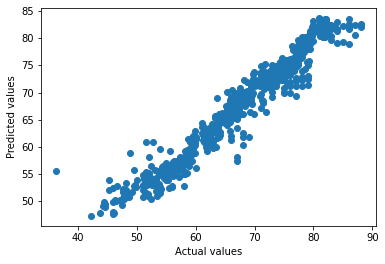

In [51]:
plt.scatter(y_test,rf_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

    LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
multi_model1=LinearRegression()
multi_model1.fit(X_train,y_train)
multi_pred=multi_model1.predict(X_test)
multi_pred_train=multi_model1.predict(X_train)

In [53]:
multi_model1.coef_

array([-1.72064431,  0.28188772,  0.63590948, -0.12354149, -0.17000845,
        0.14089146, -1.00236789,  0.68806937,  0.2206878 , -3.33451273,
       -0.02190648, -0.41240449,  3.31455919, -0.55415933,  0.55415933])

In [54]:
multi_model1.intercept_

69.67085027090161

In [55]:
#Validation on training data
print('R2 score of the training data is : {:.2f}'.format(r2_score(y_train, multi_pred_train)*100))
print('Mean absolute error of the training data is : {:.2f}'.format(mean_absolute_error(y_train,multi_pred_train)))
print('\n')
#validation on test data
print('R2 score of the testing data is : {:.2f}'.format(r2_score(y_test,multi_pred)*100))
print('Mean absolute error of the testing data is : {:.2f}'.format(mean_absolute_error(y_test,multi_pred)))

R2 score of the training data is : 84.56
Mean absolute error of the training data is : 2.77


R2 score of the testing data is : 84.03
Mean absolute error of the testing data is : 2.82


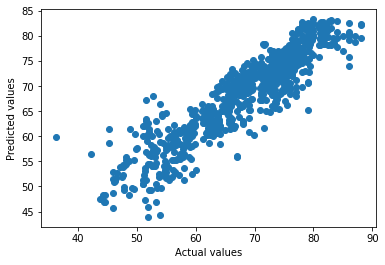

In [56]:
plt.scatter(y_test,multi_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [57]:
import pickle
import joblib
filename=open('gradient.pkl','wb')
joblib.dump(rfc,filename,compress=3)
filename.close()